In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def convert_char(column, oldchar, newchar):
    return column.str.replace(oldchar, newchar).astype(float)

In [57]:
url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population'
population_df = pd.read_html(url)[0]
population_df

State or territory Census population[8][a]                \
              State or territory     July 1, 2023 (est.) April 1, 2020   
0                            NaN                     NaN           NaN   
1                     California              38965193.0    39538223.0   
2                          Texas              30503301.0    29145505.0   
3                        Florida              22610726.0    21538187.0   
4                       New York              19571216.0    20201249.0   
..                           ...                     ...           ...   
56  Northern Mariana Islands[13]                     NaN       47329.0   
57      Contiguous United States             332746351.0   329260619.0   
58                 The 50 states             334235923.0   330759736.0   
59        The 50 states and D.C.             334914895.0   331449281.0   
60      Total US and territories                     NaN   335073176.0   

   Change,2010–2020[8][a]           House seats[b]          \
                        %      Abs.          Seats       %   
0                     NaN       NaN            NaN     NaN   
1                   6.13%   2284267             52  11.95%   
2                  15.91%   3999944             38   8.74%   
3                  14.56%   2736877             28   6.44%   
4                   4.25%    823147             26   5.98%   
..                    ...       ...            ...     ...   
56                −12.16%    −6,554             1*       —   
57                  7.36%  22585613       432(+1*)  99.31%   
58                  7.34%  22615921            435    100%   
59                  7.35%  22703743       435(+1*)    100%   
60                  7.10%  22226684       435(+6*)    100%   

   Pop. per elec. vote, 2020[c] Pop.perseat(2020)[a] % US(2020) % EC(2020)  
   Pop. per elec. vote, 2020[c] Pop.perseat(2020)[a] % US(2020) % EC(2020)  
0                           NaN                  NaN        NaN        NaN  
1                        732189               760350    11.800%     10.04%  
2                        728638               766987     8.698%      7.43%  
3                        717940               769221     6.428%      5.58%  
4                        721473               776971     6.029%      5.20%  
..                          ...                  ...        ...        ...  
56                            —                    —     0.014%          —  
57                       627163               757745    98.265%     98.70%  
58                       621729               755796    98.713%     99.44%  
59                       619531                    —    98.918%       100%  
60                            —                    —       100%          —  

[61 rows x 11 columns]

In [21]:
education_df = pd.read_csv("Data/EducationState.csv")

In [22]:
education_df.columns

Index(['State', '% High School Grad', 'HSRank', '% Bachelors Degree', 'BSRank',
       '% Advanced Degree', 'AdvancedRank'],
      dtype='object')

In [25]:
for col in education_df.columns:
    if education_df[col].dtype == 'object' and education_df[col].str.contains('%').any():
        education_df[col] = convert_char(education_df[col], '%', '')

In [26]:
education_df.head()

,State,% High School Grad,HSRank,% Bachelors Degree,BSRank,% Advanced Degree,AdvancedRank
0,Montana,92.8,1.0,29.5,20.0,9.5,31.0
1,Minnesota,92.4,2.0,33.7,10.0,11.2,17.0
2,New Hampshire,92.3,3.0,34.9,8.0,13.0,9.0
3,Wyoming,92.3,3.0,25.7,40.0,8.6,40.0
4,Alaska,92.1,5.0,28.0,26.0,10.1,27.0


In [27]:
education_df.describe()

,% High School Grad,HSRank,% Bachelors Degree,BSRank,% Advanced Degree,AdvancedRank
count,53.000000,50.000000,52.000000,50.000000,52.000000,50.000000
mean,87.794340,25.340000,29.584615,25.120000,11.136538,25.300000
std,3.749791,14.598868,5.978667,14.488053,3.826073,14.539531
min,73.000000,1.000000,19.200000,1.000000,7.400000,1.000000
25%,85.500000,13.250000,26.200000,13.250000,8.925000,13.250000
50%,88.400000,25.500000,28.700000,24.500000,10.250000,25.000000
75%,90.700000,37.500000,32.000000,37.500000,12.050000,37.750000
max,92.800000,50.000000,54.600000,50.000000,31.300000,50.000000


In [41]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               53 non-null     object 
 1   % High School Grad  53 non-null     float64
 2   HSRank              50 non-null     float64
 3   % Bachelors Degree  52 non-null     float64
 4   BSRank              50 non-null     float64
 5   % Advanced Degree   52 non-null     float64
 6   AdvancedRank        50 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


In [51]:
# education_df[['State','HSRank']]
row = education_df[education_df['State'] == 'United States']

index_to_drop = education_df[education_df['State'] == 'United States'].index
index_to_drop2 = education_df[education_df['State'] == 'Puerto Rico'].index

education_df.drop(index_to_drop, inplace=True)
education_df.drop(index_to_drop2, inplace=True)

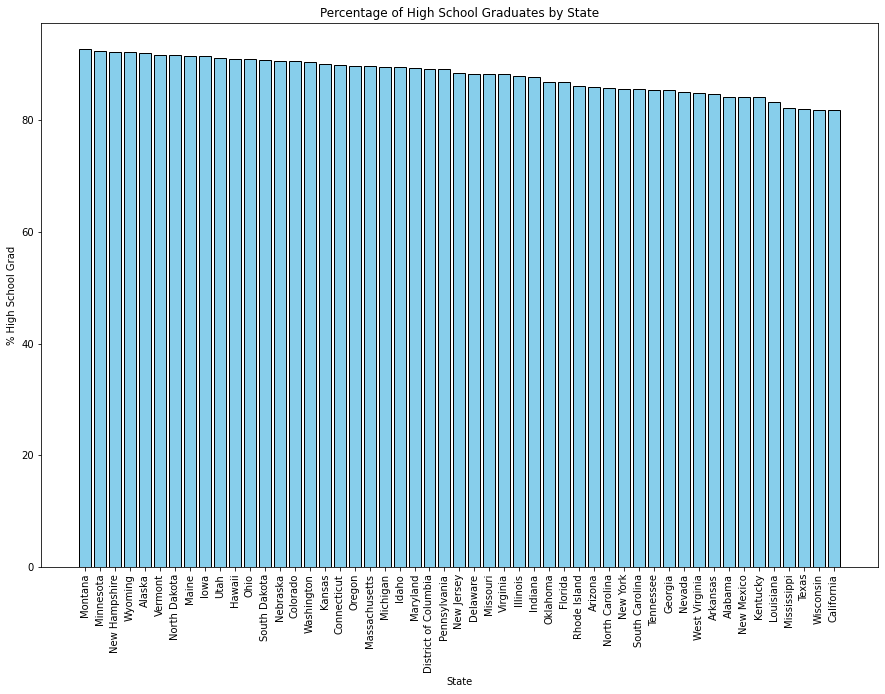

In [52]:
plt.figure(figsize=(15, 10))
plt.bar(education_df['State'], education_df['% High School Grad'], color='skyblue', edgecolor='black')
plt.title('Percentage of High School Graduates by State')
plt.xlabel('State')
plt.ylabel('% High School Grad')
plt.xticks(rotation=90)  
plt.show()

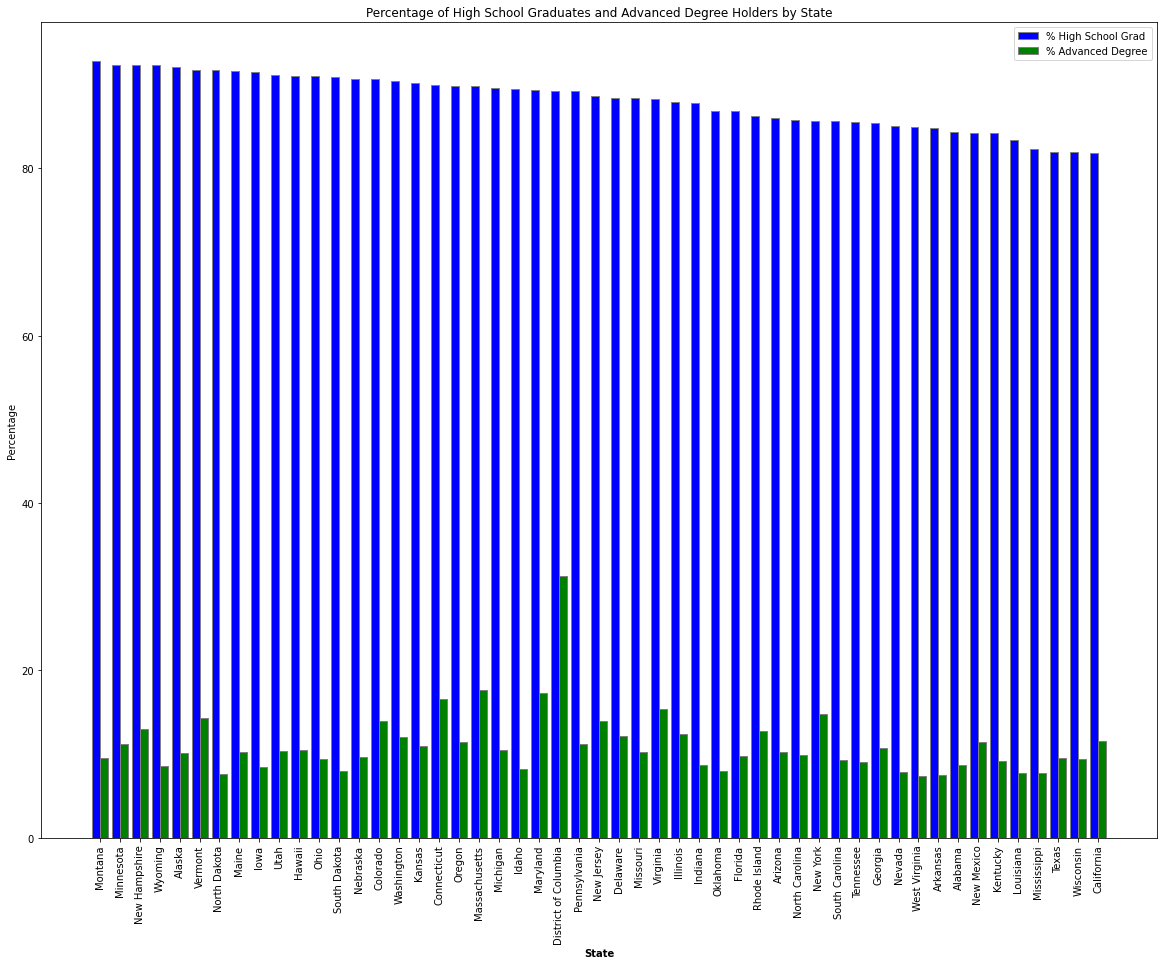

In [53]:
# Assuming your original DataFrame is named 'education_df'
df = education_df.copy()

barWidth = 0.4
r1 = np.arange(len(df['% High School Grad']))
r2 = [x + barWidth for x in r1]

# Plotting
plt.figure(figsize=(20, 15))
plt.bar(r1, df['% High School Grad'], color='blue', width=barWidth, edgecolor='gray', label='% High School Grad')
plt.bar(r2, df['% Advanced Degree'], color='green', width=barWidth, edgecolor='gray', label='% Advanced Degree')

# Add xticks on the middle of the group bars
plt.xlabel('State', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(df['% High School Grad']))], df['State'], rotation=90)
plt.ylabel('Percentage')
plt.title('Percentage of High School Graduates and Advanced Degree Holders by State')

# Create legend & Show graphic
plt.legend()
plt.show()

In [8]:
state_census_df = pd.read_csv("Data/State_Census_Data.csv")
state_census_df.head()

,Unnamed: 0,2017,2018,Change,PercentChange
0,Alabama,"4,875,120","4,887,871","12,751",0.3
1,Alaska,"739,786","737,438","-2,348",-0.3
2,Arizona,"7,048,876","7,171,646","122,770",1.7
3,Arkansas,"3,002,997","3,013,825","10,828",0.4
4,California,"39,399,349","39,557,045","157,696",0.4


In [9]:
state_census_df.describe()

,PercentChange
count,51.000000
mean,0.576471
std,0.652561
min,-0.600000
25%,0.150000
50%,0.400000
75%,1.000000
max,2.100000


In [13]:
state_census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     51 non-null     object 
 1   2017           51 non-null     object 
 2   2018           51 non-null     object 
 3   Change         51 non-null     object 
 4   PercentChange  51 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.1+ KB
